In [235]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import fuzzywuzzy
from fuzzywuzzy import process
%matplotlib inline
from fuzzywuzzy import fuzz

In [236]:
ramen=pd.read_csv('ramen-ratings.csv')

In [237]:
ramen

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [238]:
ramen.isnull().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

In [239]:
ramen.drop('Top Ten', axis=1, inplace=True)

In [240]:
ramen['Country'].unique()

array(['Japan', 'Taiwan', 'USA', 'India', 'South Korea', 'Singapore',
       'Thailand', 'Hong Kong', 'Vietnam', 'Ghana', 'Malaysia',
       'Indonesia', 'China', 'Nigeria', 'Germany', 'Hungary', 'Mexico',
       'Fiji', 'Australia', 'Pakistan', 'Bangladesh', 'Canada', 'Nepal',
       'Brazil', 'UK', 'Myanmar', 'Netherlands', 'United States',
       'Cambodia', 'Finland', 'Sarawak', 'Philippines', 'Sweden',
       'Colombia', 'Estonia', 'Holland', 'Poland', 'Dubai'], dtype=object)

# Barplot-distribution per country (TOP 10)

In [241]:
grouped_by_country=ramen.groupby('Country').size().reset_index(name='Number_of_reviews')

In [242]:
grouped_by_country= grouped_by_country.sort_values('Number_of_reviews', ascending=False)[0:9]

Text(0.5, 1.0, 'Ramen distribution per country')

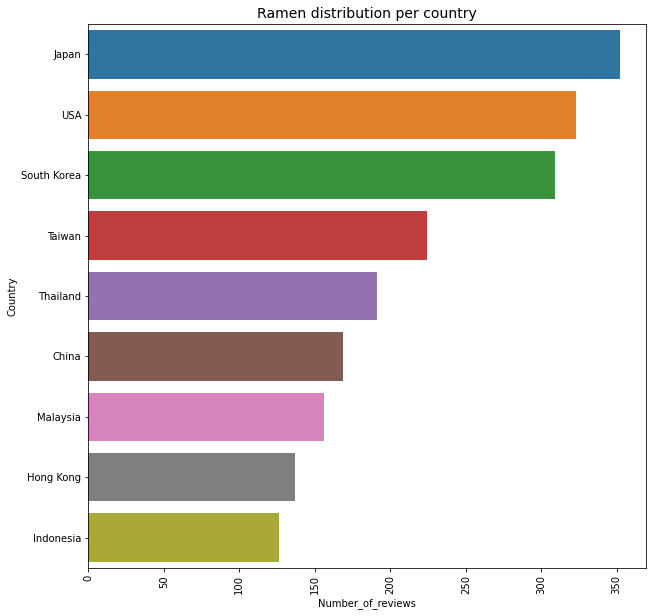

In [243]:
plt.subplots(figsize=(10,10))
ax=sn.barplot(data=grouped_by_country, x='Number_of_reviews',
           y='Country',
           order=grouped_by_country.sort_values('Number_of_reviews', ascending=False).Country)
plt.xticks(rotation=90)
ax.set_title('Ramen distribution per country', fontsize=14)

# Data manipulation: Evaluating categorical values written twice differently

In [244]:
brands=ramen['Brand'].unique()

In [245]:
brands.sort()

In [246]:
# Replaces rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 90):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

In [247]:
replace_matches_in_column(df=ramen, column="Brand", string_to_match="Chorip Dong", min_ratio = 47)
replace_matches_in_column(df=ramen, column="Brand", string_to_match="Fashion Food", min_ratio = 47)
replace_matches_in_column(df=ramen, column="Brand", string_to_match="Mama", min_ratio = 47)
replace_matches_in_column(df=ramen, column="Brand", string_to_match="Wu Mu", min_ratio = 47)
replace_matches_in_column(df=ramen, column="Brand", string_to_match="A1", min_ratio = 47)

All done!
All done!
All done!
All done!
All done!


# Data manipulation: Removing duplicates reviews

In [248]:
duplicates=ramen['Review #'].duplicated().sum()

In [249]:
duplicates

0

# II) Is there a relation between the ratings and the product's style?

In [250]:
type(ramen['Stars'][0])

str

In [251]:
# Using errors=’coerce’. It will replace all non-numeric values with NaN.
ramen['Stars']=pd.to_numeric(ramen['Stars'], errors='coerce')

In [252]:
ramen.loc[ramen['Stars'].isnull()]

,Review #,Brand,Variety,Style,Country,Stars
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,NaN
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,NaN
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,NaN


### filling the NaN values from the column 'Stars' and the column 'Style'

In [253]:
ramen['Stars']=ramen['Stars'].fillna(method='bfill', axis=0)

In [254]:
ramen.loc[ramen['Stars'].isnull()]

,Review #,Brand,Variety,Style,Country,Stars


In [255]:
ramen['Style']=ramen['Style'].fillna(method='bfill', axis=0)

In [256]:
ramen.loc[ramen['Style'].isnull()]

,Review #,Brand,Variety,Style,Country,Stars


### style percentage

In [257]:
style_percent=ramen['Style'].value_counts()/len(ramen['Style'])*100

In [258]:
style_percent

Pack    59.379845
Bowl    18.682171
Cup     17.441860
Tray     4.186047
Box      0.232558
Can      0.038760
Bar      0.038760
Name: Style, dtype: float64

### more than 59% of noodlesold  are in pack but the style that got the best rating is bar.

In [259]:
styles_and_stars=ramen[['Stars', 'Style']]

In [260]:
styles_and_stars.groupby('Style')['Stars'].mean()

Style
Bar     5.000000
Bowl    3.669295
Box     4.291667
Can     3.500000
Cup     3.498500
Pack    3.700587
Tray    3.545139
Name: Stars, dtype: float64

In [261]:
styles_and_stars=styles_and_stars.groupby('Style')['Stars'].mean().reset_index().sort_values(by='Stars',ascending=False)

Text(0.5, 1.0, 'Distribution of average rankings across different styles')

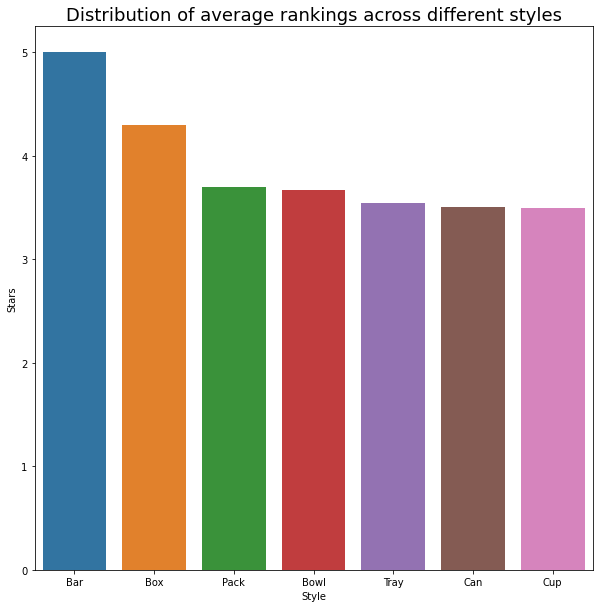

In [262]:
plt.subplots(figsize=(10,10))
ax=sn.barplot(data=styles_and_stars, x='Style', y='Stars')
ax.set_title('Distribution of average rankings across different styles',fontsize=18)

### bar noodle gets the highest rating.
Is it because the price? bar noodle are more expensive than pack noodles? 

In [263]:
ramen_distribution=ramen.copy()

In [264]:
ramen_distribution

,Review #,Brand,Variety,Style,Country,Stars
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75
...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00


In [265]:
Style_dict = {ramen_distribution.Style.unique()[i]: i+1 for i in range(0,len(ramen_distribution.Style.unique()))}
ramen_distribution.Style.replace(Style_dict,inplace=True)

In [266]:
ramen_distribution

,Review #,Brand,Variety,Style,Country,Stars
0,2580,New Touch,T's Restaurant Tantanmen,1,Japan,3.75
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,2,Taiwan,1.00
2,2578,Nissin,Cup Noodles Chicken Vegetable,1,USA,2.25
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,2,Taiwan,2.75
4,2576,Ching's Secret,Singapore Curry,2,India,3.75
...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",4,Vietnam,3.50
2576,4,Wai Wai,Oriental Style Instant Noodles,2,Thailand,1.00
2577,3,Wai Wai,Tom Yum Shrimp,2,Thailand,2.00
2578,2,Wai Wai,Tom Yum Chili Flavor,2,Thailand,2.00


Text(0.5, 1.0, 'Distributions of different ramen style rankings')

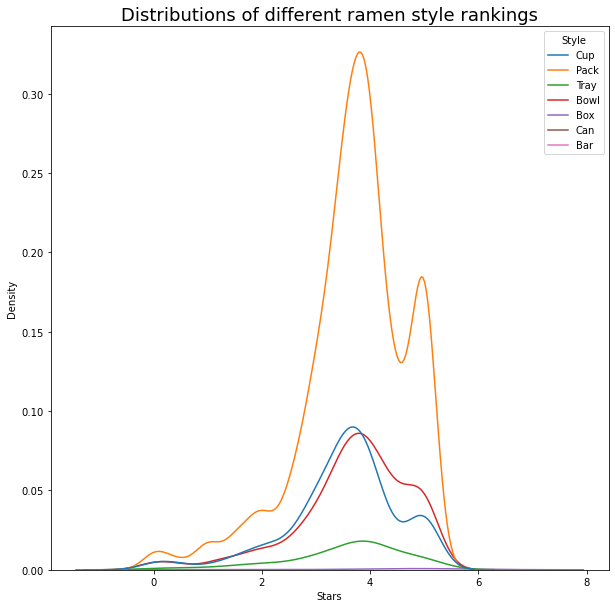

In [267]:
plt.subplots(figsize=(10,10))
ax = sn.kdeplot(data=ramen, x='Stars', hue='Style', warn_singular=False)
ax.set_title("Distributions of different ramen style rankings", fontsize=18)

### pack noodles has the most distributed noodle style. Which means that sellers mostly buy noodle in pack.

# III) What makes a good ramen?

## 1- Which meat flavor is the best seller?
## 2-What type of noodle is the best seller? 
## 3-Do consumers prefer spicy or not spicy noodles? 


# Step one-Features extractions

In [268]:
#list of meat types and noodle types
meat_types=['chicken','beef','duck','pork','shrimp','turkey']
noodle_types=['udon','soba','ramen','egg','shirataki','hokkien','noodles']
spc = ['spicy','hot','flaming','chili']

# boolean functions for flavors, noodle types and meat types detection

def contain_flavor(data):
    low=data.lower()
    return 1 if 'flavor' in low else 0

def which_meat(data):
    low=data.lower()
    for meat in meat_types:
        if meat in low:
            return meat
    return 'unspecified'

def which_noodle(data):
    low=data.lower()
    for noodle in noodle_types:
        if noodle in low:
            return noodle
    return 'unspecified'


def is_spicy(data):
    low=data.lower()
    for el in spc:
        if el in data:
            return 1
    return 0

In [269]:
#adding new columns in pandas

ramen['contains_flavor']=ramen['Variety'].apply(contain_flavor)
ramen['meat_type']=ramen['Variety'].apply(which_meat)
ramen['noodle_type']=ramen['Variety'].apply(which_noodle)
ramen['is_spicy']=ramen['Variety'].apply(is_spicy)


In [270]:
#copying a new dataframe from the original one with columns that interests us

ramen_ingredients=ramen[['Country','Brand','contains_flavor','meat_type','noodle_type','is_spicy','Style','Stars']].copy() 


In [271]:
ramen_ingredients.head()

,Country,Brand,contains_flavor,meat_type,noodle_type,is_spicy,Style,Stars
0,Japan,New Touch,0,unspecified,unspecified,0,Cup,3.75
1,Taiwan,Just Way,0,unspecified,noodles,0,Pack,1.00
2,USA,Nissin,0,chicken,noodles,0,Cup,2.25
3,Taiwan,Wei Lih,1,unspecified,ramen,0,Pack,2.75
4,India,Ching's Secret,0,unspecified,unspecified,0,Pack,3.75


Text(0.5, 1.0, 'Distribution of rankings of different meat types across different styles')

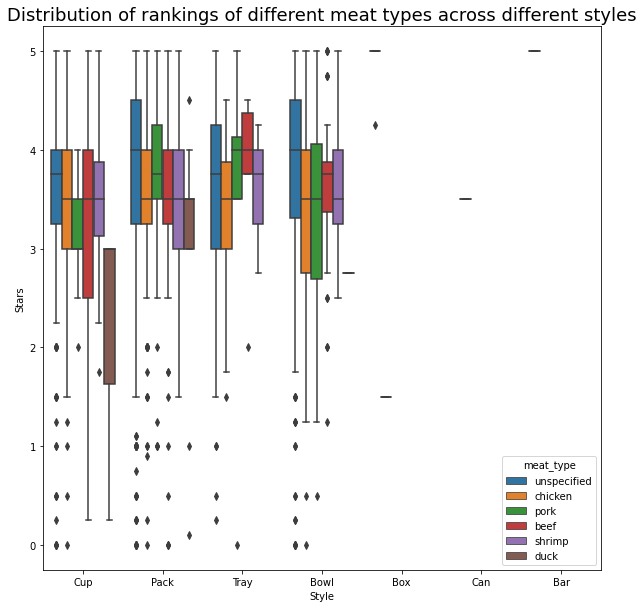

In [272]:
ramen_ingredients.value_counts('meat_type')
plt.subplots(figsize=(10,10))
ax=sn.boxplot(data=ramen_ingredients ,hue='meat_type', x='Style', y='Stars')
ax.set_title('Distribution of rankings of different meat types across different styles',fontsize=18)

Text(0.5, 1.0, 'Distribution of rankings of different meat types across different styles')

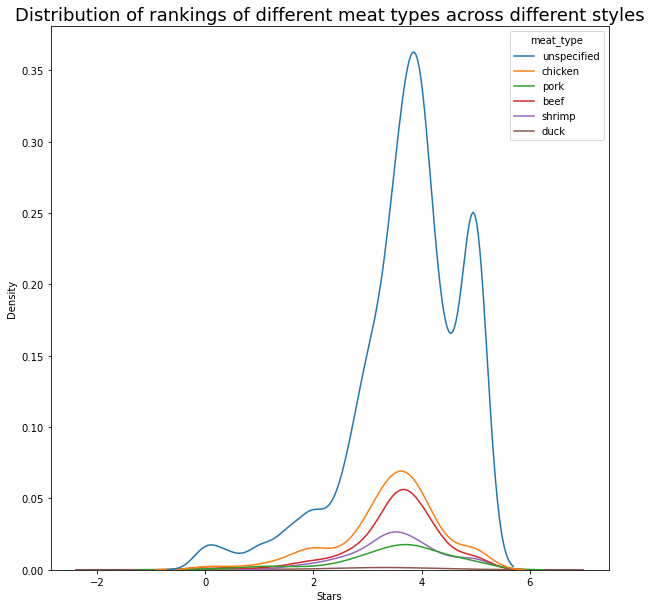

In [283]:
plt.subplots(figsize=(10,10))
ax = sn.kdeplot(data=ramen_ingredients, x='Stars', hue='meat_type', warn_singular=False)
ax.set_title('Distribution of rankings of different meat types across different styles',fontsize=18)

In [274]:
#percentage meat type consumed
meat_type_percent=ramen_ingredients['meat_type'].value_counts()/len(ramen_ingredients['meat_type'])*100

In [275]:
meat_type_percent

unspecified    68.953488
chicken        12.713178
beef            8.992248
shrimp          4.922481
pork            3.914729
duck            0.503876
Name: meat_type, dtype: float64

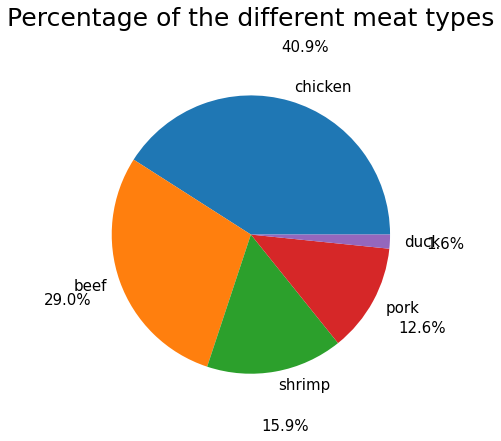

In [306]:
plt.pie(meat_type_percent[1:6],pctdistance=1.4,autopct="%2.01f%%",radius=1.6,labels=['chicken','beef','shrimp','pork','duck'],
        explode=[0,0,0,0,0],
textprops={'fontsize': 15})
plt.title('Percentage of the different meat types', fontsize=25, pad=100)
plt.show()


## even though several labels do not indicate the meat type (mostly 70%), chicken and beef noodles seem to be the most noodle bought by customers

In [277]:
noodle_percent=ramen_ingredients['noodle_type'].value_counts()/len(ramen_ingredients['noodle_type'])*100

In [278]:
noodle_percent

unspecified    57.286822
noodles        22.713178
ramen          12.984496
udon            3.178295
soba            3.023256
egg             0.542636
hokkien         0.271318
Name: noodle_type, dtype: float64

Text(0.5, 1.0, 'Percentage of the different types of noodles')

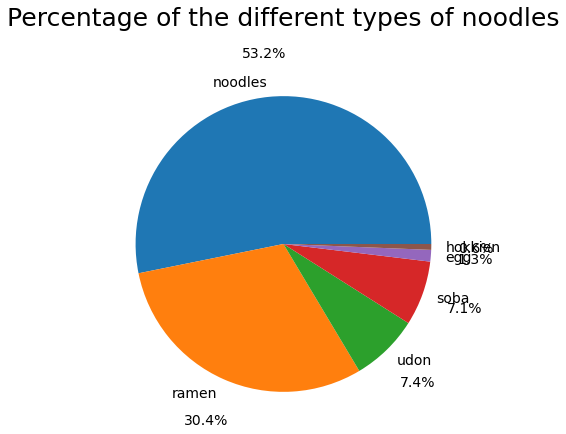

In [305]:
plt.pie(noodle_percent[1:7],pctdistance=1.3,autopct="%2.01f%%",radius=1.7,labels=['noodles','ramen','udon','soba','egg','hokkien'],
        explode=[0,0,0,0,0,0],textprops={'fontsize': 14})
plt.title('Percentage of the different types of noodles', fontsize=25, pad=110)

## 3-Do consumers prefer spicy or not spicy noodles? 

In [280]:
is_spicy_percent=ramen_ingredients['is_spicy'].value_counts()/len(ramen_ingredients['is_spicy'])*100

In [281]:
is_spicy_percent

0    99.728682
1     0.271318
Name: is_spicy, dtype: float64

## Given seveval variety value do not contain the word'spicy', we cannot identify.
## However, we can identify the distribution of stars in spicy and not spicy products

/Users/aurelield/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/aurelield/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


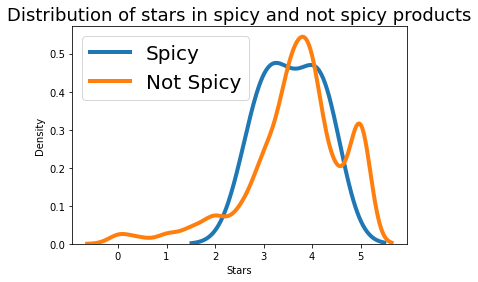

In [282]:
ax = sn.distplot(ramen_ingredients[ramen_ingredients['is_spicy']==1]['Stars'],hist=False,label = "Spicy",kde_kws={'lw':4} )
ax = sn.distplot(ramen_ingredients[ramen_ingredients['is_spicy']==0]['Stars'],hist=False,label = "Not Spicy",kde_kws={'lw':4} )


plt.legend(prop={'size':20})
ax.set_title('Distribution of stars in spicy and not spicy products',fontsize=18)    
plt.show()